In [18]:
pip install fasttext-wheel

Note: you may need to restart the kernel to use updated packages.
     ------------------------------------ 225.6/225.6 kB 186.2 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Spam detection

分类器使用Fasttext库在垃圾邮件分类数据集上训练的词向量。

> fastText 是一个由Facebook的AI Research实验室创建的用于学习单词嵌入和文本分类的库。该模型允许创建一种非监督学习或监督学习算法，以获取单词的矢量表示。Facebook提供了294种语言的预训练模型。
https://github.com/facebookresearch/fastText

> pandas和numpy是常用的数据分析的Python库，用于处理数据变形和统计。
https://github.com/pandas-dev/pandas
https://github.com/numpy/numpy

> TensorFlow是一个开源软件库，用于各种感知和语言理解任务的机器学习。用来做数据的预处理和模型训练。
https://github.com/tensorflow/tensorflow

> pandas-profiling是一个用来对数据集进行初步统计描述的库，生成的报告可以从多个方面描述数据集的原始特征。

In [2]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
#所需的库安装
import fasttext
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib

import tensorflow as tf

In [21]:
#特征工程使用
from sklearn.feature_extraction.text import CountVectorizer

#机器学习模型比较
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
import seaborn as sns
import lightgbm as lgb


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [22]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

## 词嵌入 (Word embedding)

词嵌入是自然语言处理中语言模型与表征学习技术的统称。概念上而言，它是指把一个维数为所有词的数量的高维空间嵌入到一个维数低得多的连续向量空间中，每个单词或词组被映射为实数域上的向量。 词嵌入的方法包括人工神经网络、对词语同现矩阵降维、几率模型以及单词所在上下文的显式表示等。

深度学习的任务就是把高维原始数据（图像，句子）映射到低维流形，使得高维的原始数据被映射到低维流形之后变得可分，而这个映射就叫嵌入（Embedding）。比如Word Embedding，就是把单词组成的句子映射到一个表征向量。但后来开始把低维流形的表征向量叫做Embedding，Embedding就是从原始数据提取出来的Feature，也就是那个通过神经网络映射之后的低维向量。




In [24]:
#估算 embedding 的预设值
embedding_size = 50
max_words_len = 50

In [25]:
spam = 'spam.csv'

In [26]:
messages = pd.read_csv(spam,names=["Label", "Text"]) 
messages[ :3]

,Label,Text
0,Label,Text
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...


In [27]:
# Get all the ham and spam emails
ham_msg = messages[messages.Label =='ham']
spam_msg = messages[messages.Label=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.Text.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.Text.to_numpy().tolist())
print(spam_msg_text)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

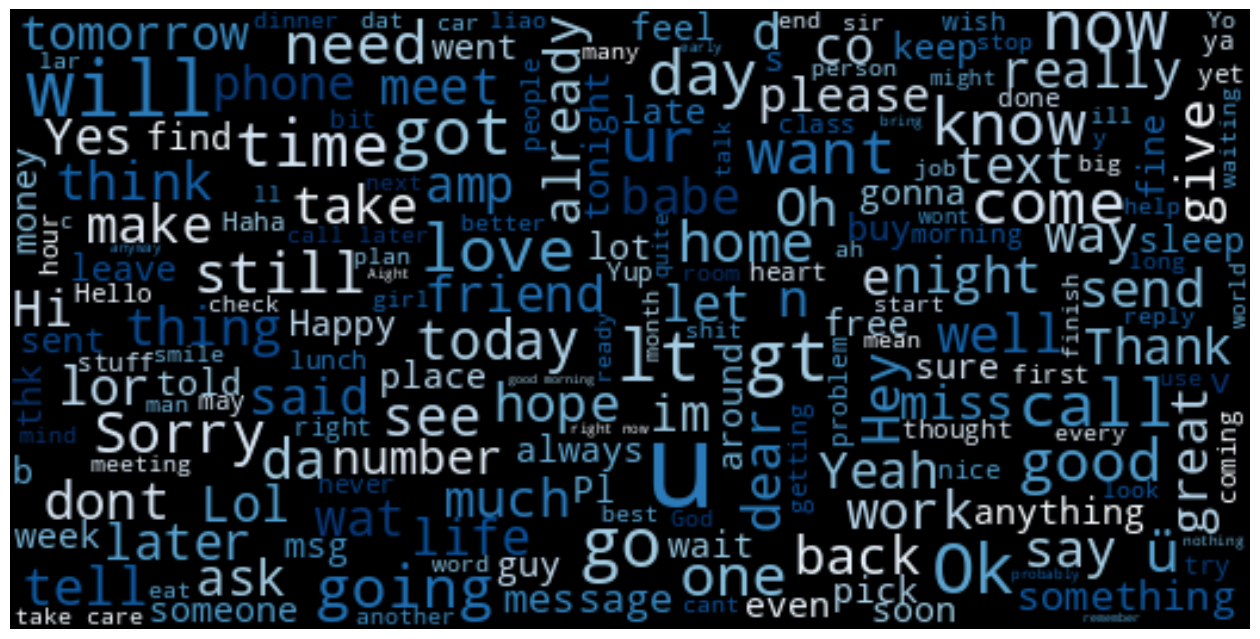

In [28]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

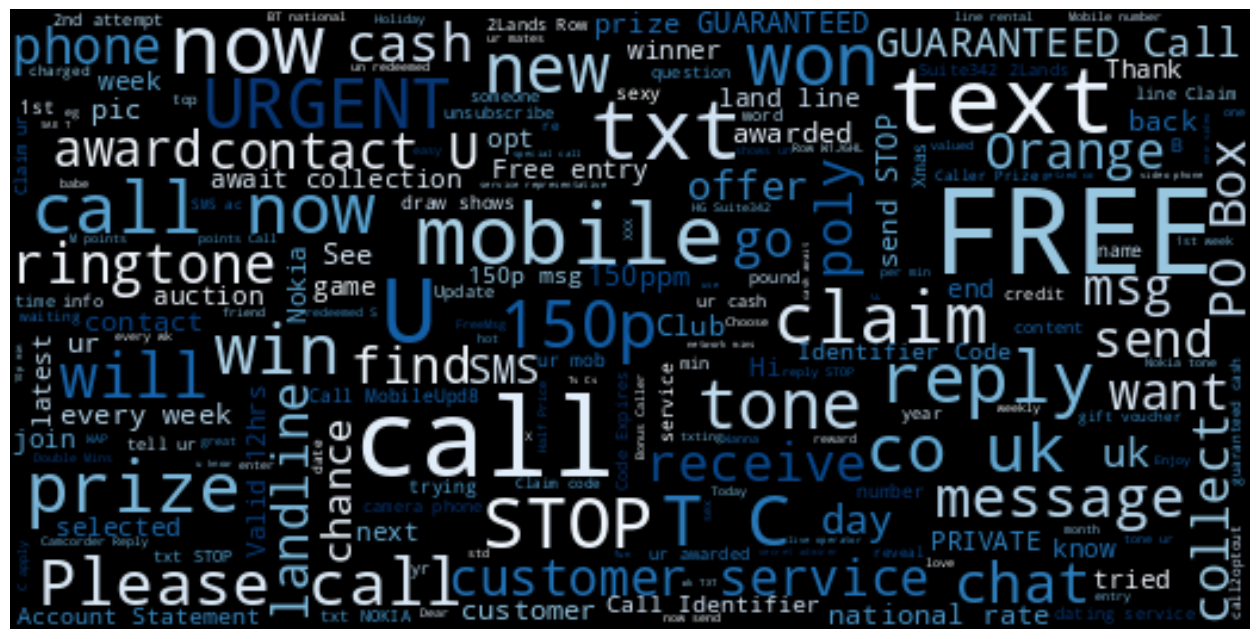

In [29]:
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text) 
plt.figure(figsize=(16,10)) 
plt.imshow(spam_msg_cloud, interpolation='bilinear') 
plt.axis('off') # 关闭轴
plt.show()

# 数据探索

在打开文件之前，我们首先需要判断文本文件的编码格式和主要文本的语言。首先检测文本的编码和语言。

In [30]:
file = 'train.csv'  #训练集文件
testfile = 'test.csv' #测试集文件\
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

## 读取训练文件

因ID字段实际上是无效信息，因此只取Label和Text字段，为了后续处理方便，重新命名为v1，v2

In [31]:
df = pd.read_csv(file, encoding='utf-8').loc[:,['Label','Text']]
df.columns = ['v1', 'v2']
df.head()

,v1,v2
0,spam,Reply to win £100 weekly! Where will the 2006 ...
1,ham,Hello. Sort of out in town already. That . So ...
2,ham,How come guoyang go n tell her? Then u told her?
3,ham,Hey sathya till now we dint meet not even a si...
4,spam,Orange brings you ringtones from all time Char...


## 读取测试集文件

In [33]:
df_test = pd.read_csv(testfile, encoding='utf-8').loc[:,['Label','Text']]
df_test.columns = ['v1', 'v2']
df_test

,v1,v2
0,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
1,ham,And also I've sorta blown him off a couple tim...
2,ham,Mmm thats better now i got a roast down me! i...
3,ham,Mm have some kanji dont eat anything heavy ok
4,ham,So there's a ring that comes with the guys cos...
...,...,...
1110,ham,Den only weekdays got special price... Haiz......
1111,ham,I not busy juz dun wan 2 go so early.. Hee..
1112,ham,Yes i have. So that's why u texted. Pshew...mi...
1113,ham,How are you enjoying this semester? Take care ...


# 数据预处理

In [36]:
# 这里我们对数据做预处理，使用正则表达式做一系例替换，也可以进一步通过停止词（stopword）等方式再做清洗。

def preprocess(df_):
    df_cleaned = df_.copy()
    # 删除无效NaN的字符
    df_cleaned.dropna(inplace = True)
    # 替换掉数字，变成单词 number
    df_cleaned['v2'] = df_cleaned['v2'].str.replace(r'\d',' number ', regex = True)
    # 去掉标点符号
    df_cleaned['v2'] = df_cleaned['v2'].str.replace(r'[^a-zA-Z]', ' ', regex = True)
    # 去掉单字母
    df_cleaned['v2'] = df_cleaned['v2'].str.replace(r'\s+[a-zA-Z]\s+', ' ', regex = True)
    # 去掉额外的空格
    df_cleaned['v2'] = df_cleaned['v2'].str.replace(r'\s+', ' ', regex = True).map(lambda x:x.lower())
    return df_cleaned

df = preprocess(df)
# 同样对测试集做预处理
df_test = preprocess(df_test)

df_test

,v1,v2
0,ham,squeeeeeze this is christmas hug if lik my frn...
1,ham,and also ve sorta blown him off couple times r...
2,ham,mmm thats better now got roast down me d bette...
3,ham,mm have some kanji dont eat anything heavy ok
4,ham,so there a ring that comes with the guys costu...
...,...,...
1110,ham,den only weekdays got special price haiz cant ...
1111,ham,i not busy juz dun wan number go so early hee
1112,ham,yes have so that why texted pshew missing you ...
1113,ham,how are you enjoying this semester take care b...


# Vectorisation using bag of words(BoW)

In [37]:
# train set
train_bow = CountVectorizer(analyzer='word')
train_matrix = train_bow.fit_transform(df['v2'])  
train_features = train_matrix.toarray()
train_vocab = train_bow.get_feature_names_out()  

train_features.shape

(4457, 6868)

In [38]:
# Test set
test_bow = CountVectorizer(analyzer='word')
test_matrix = test_bow.fit_transform(df_test['v2'])  
test_features = test_matrix.toarray()
test_vocab = test_bow.get_feature_names_out()  
test_features.shape

(1115, 3235)

# 创建语料库（Corpus）

> 我们在这里把train.csv和test.csv两个数据集中的文本都放入语料库文件，以获得更多的训练内容

In [39]:
df_corpus = pd.concat([df, df_test],ignore_index=True)
df_corpus

,v1,v2
0,spam,reply to win number number number weekly where...
1,ham,hello sort of out in town already that so dont...
2,ham,how come guoyang go tell her then told her
3,ham,hey sathya till now we dint meet not even sing...
4,spam,orange brings you ringtones from all time char...
...,...,...
5567,ham,den only weekdays got special price haiz cant ...
5568,ham,i not busy juz dun wan number go so early hee
5569,ham,yes have so that why texted pshew missing you ...
5570,ham,how are you enjoying this semester take care b...


In [40]:
# Create a corpus file and put the cleaned Text fields from the train.csv dataset into the spamcorpus file.

with open(r'./spamcorpus.txt', 'w', encoding="utf-8") as txtfile:
    for i in range(len(df_corpus)):
        line = df_corpus.loc[i,'v2']
        txtfile.write(line)
        txtfile.write('\n')

In [41]:
# Training word vector models using fasttext and corpus files
model = fasttext.train_unsupervised('./spamcorpus.txt',
                                    minCount = 5, 
                                    model='skipgram',
                                    minn = 2,
                                    maxn = 5,
                                    dim = embedding_size,
                                    lr = 0.1,
                                    epoch = 10)

接下来，通过选择数据集中的所有独立词来创建一个txt文件，包含数据集中的每一个独立的词和它的embedding。

然后使用训练好的skigram模型，我们可以得到每个词的embedding。

In [42]:
with open(r'spamcorpus.txt', 'r', encoding="utf-8") as txtfile:
    corpus_sentences = txtfile.readlines()
    corpus_words = []
    for sent in corpus_sentences:
        tokenized_sent = sent.split()
        for word_ in tokenized_sent:
            corpus_words.append(word_)
            
    corpus_unique_words = list(set(corpus_words))

In [43]:
#embedding file
with open(r'./fasttext_embeddings.txt', 'w', encoding="utf-8") as txtfile:
    txtfile.write(str(len(corpus_unique_words)) + " " + str(model.get_dimension()))
    txtfile.write('\n')
    for word in corpus_unique_words:
        embedding = model.get_word_vector(word)
        vstr = ""
        for vi in embedding:
            vstr += " " + str(vi)
        txtfile.write(word + vstr)
        txtfile.write('\n')



## 训练数据准备

由于这个文件现在已经准备好了，数据准备步骤将如下。

1：创建一个keras tokenizer，并在清理过的文本上进行拟合。

拟合后的标记器现在有一个每个独特单词的字典，以及它在随机初始化的embedding矩阵中的索引。

2：我们将从fasttext训练的skipgram模型中创建嵌入矩阵，并将使用它代替随机初始化的embedding矩阵。

3：tokenizer 将每个词的序列转换为它们在tokenizer和embedding中的索引的序列。

4：字数超过最大字数长度（在本笔记本中为50个）的序列被截断，而字数较少的序列则被填充到最大字数长度。

In [44]:
#第1步：创建一个keras tokenizer，并在清理过的文本上进行拟合。
num_words = len(corpus_unique_words)
tokenizer = Tokenizer(num_words+1, oov_token = 'UNK')
tokenizer.fit_on_texts(df_corpus['v2'])


In [45]:
#第2步：我们将从fasttext训练的skipgram模型中创建embedding矩阵，并将使用它代替随机初始化的embedding矩阵。

vocab_size = len(tokenizer.word_index)+1
embeddings_matrix = np.zeros(shape = (vocab_size , embedding_size))

for word, index in tqdm(tokenizer.word_index.items()):
    embeddings_matrix[index] = model.get_word_vector(word)
    
vocab_size

100%|███████████████████████████████████████████████████████████████████████████| 7782/7782 [00:00<00:00, 91108.75it/s]


7783

# Tokenizer 
    将每个词的sequences转换为它们在tokenizer和embedding中的索引的sequences。
## 处理训练集和测试集

## 获得训练集

In [46]:
# 字数超过最大字数长度（在本笔记本中为50个）的序列被截断，而字数较少的序列则被填充到最大字数长度。
x_train = tokenizer.texts_to_sequences(df['v2'])
x_train = pad_sequences(x_train, padding = 'post', maxlen = max_words_len, truncating='post')
#x_train = train_features
# 将标签编码
y_train = pd.get_dummies(df['v1'])['spam'].values

## 获得测试集

In [47]:
# 字数超过最大字数长度（在本笔记本中为50个）的序列被截断，而字数较少的序列则被填充到最大字数长度。
x_test = tokenizer.texts_to_sequences(df_test['v2'])
x_test = pad_sequences(x_test, padding = 'post', maxlen = max_words_len, truncating='post')
#x_test = test_features
# 将标签编码
y_test = pd.get_dummies(df_test['v1'])['spam'].values

# 逻辑回归模型

In [48]:
classifier = LogisticRegression(max_iter=300)
classifier.fit(x_train,y_train)
y_lr=classifier.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_lr,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_lr,y_test))
print()
print('Classification Report \n',classification_report(y_lr,y_test))

Confusion Matrix 
 [[939 125]
 [ 27  24]]

Accuracy Score 
 0.863677130044843

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.88      0.93      1064
           1       0.16      0.47      0.24        51

    accuracy                           0.86      1115
   macro avg       0.57      0.68      0.58      1115
weighted avg       0.93      0.86      0.89      1115



# 朴素贝叶斯 NB模型

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_gb=classifier.predict(x_test)

print('Confusion Matrix \n',confusion_matrix(y_gb,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_gb,y_test))
print()
print('Classification Report \n',classification_report(y_gb,y_test))

# 支持向量分类器（SVM）模型

In [ ]:
classifier = SVC()
classifier.fit(x_train,y_train)
y_svc=classifier.predict(x_test)
('Confusion Matrix \n',confusion_matrix(y_svc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_svc,y_test))
print()
print('Classification Report \n',classification_report(y_svc,y_test))

# 决策树

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_tree=classifier.predict(x_test)

print('Confusion Matrix \n',confusion_matrix(y_tree,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_tree,y_test))
print()
print('Classification Report \n',classification_report(y_tree,y_test))

# K最近邻

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)
y_nb = classifier.predict(x_test)
 
print('Confusion Matrix \n',confusion_matrix(y_nb,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_nb,y_test))
print()
print('Classification Report \n',classification_report(y_nb,y_test))

# Random Forest

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
y_rfc=classifier.predict(x_test)

print('Confusion Matrix \n',confusion_matrix(y_rfc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_rfc,y_test))
print()
print('Classification Report \n',classification_report(y_rfc,y_test))

# Summery

In [ ]:
mylist = np.concatenate((y_rfc.reshape(len(y_rfc),1), y_test.reshape(len(y_test),1)),1)

In [ ]:
lr_df = pd.DataFrame(data=[f1_score(y_test,y_lr),accuracy_score(y_test, y_lr), recall_score(y_test, y_lr), precision_score(y_test, y_lr), roc_auc_score(y_test, y_lr)], 
             columns=['Logistic Regression'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

knb_df = pd.DataFrame(data=[f1_score(y_test,y_nb),accuracy_score(y_test, y_nb), recall_score(y_test, y_nb), precision_score(y_test, y_nb), roc_auc_score(y_test, y_nb)], 
             columns=['K Nearest Neighbour'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

svc_df = pd.DataFrame(data=[f1_score(y_test,y_svc),accuracy_score(y_test, y_svc), recall_score(y_test, y_svc), precision_score(y_test, y_svc), roc_auc_score(y_test,y_svc)], 
             columns=['Support Vector Machines'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

dt_df = pd.DataFrame(data=[f1_score(y_test,y_tree),accuracy_score(y_test, y_tree), recall_score(y_test, y_tree), precision_score(y_test, y_tree), roc_auc_score(y_test, y_tree)], 
             columns=['Decision Tree'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

nb_df = pd.DataFrame(data=[f1_score(y_test,y_gb),accuracy_score(y_test, y_gb), recall_score(y_test, y_gb), precision_score(y_test, y_gb), roc_auc_score(y_test, y_gb)], 
             columns=['Naive Bayes'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
			 
rf_df = pd.DataFrame(data=[f1_score(y_test,y_rfc),accuracy_score(y_test, y_rfc), recall_score(y_test, y_rfc),precision_score(y_test, y_rfc), roc_auc_score(y_test, y_rfc)], 
             columns=['Random Forest'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


df_models = round(pd.concat([lr_df,knb_df,rf_df,nb_df,dt_df,svc_df], axis=1),3)
colors = ["bisque","ivory","sandybrown","steelblue","lightsalmon"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "white"

fig = plt.figure(figsize=(18,26)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":16})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')
plt.show()

# BiLSTM模型

In [49]:
# 字数超过最大字数长度（在本笔记本中为50个）的序列被截断，而字数较少的序列则被填充到最大字数长度。
x_train = tokenizer.texts_to_sequences(df['v2'])
x_train = pad_sequences(x_train, padding = 'post', maxlen = max_words_len, truncating='post')
# 将标签编码
y_train = pd.get_dummies(df['v1'])['spam'].values

## 获得测试集

In [50]:
# 字数超过最大字数长度（在本笔记本中为50个）的序列被截断，而字数较少的序列则被填充到最大字数长度。
x_test = tokenizer.texts_to_sequences(df_test['v2'])
x_test = pad_sequences(x_test, padding = 'post', maxlen = max_words_len, truncating='post')
# 将标签编码
y_test = pd.get_dummies(df_test['v1'])['spam'].values
len(x_test)

1115

In [51]:
x_train.shape

(4457, 50)

In [52]:
# bidirectional LSTM model
def create_model():
    model = Sequential()
    embedding_layer = Embedding(vocab_size, embedding_size, 
                                weights=[embeddings_matrix], 
                                input_length=max_words_len , 
                                trainable=True)
    
    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(100, kernel_regularizer=tf.keras.regularizers.l1_l2(0.001, 0.01))))
    model.add(Dropout(0.2))
    model.add(Dense(24, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

model = create_model()

early_stopping = EarlyStopping(monitor= 'val_accuracy', 
                               mode = 'max',
                               patience=30, 
                               verbose=1)

model_checkpoint = ModelCheckpoint('SPAM_CLASSIFIER',
                                   monitor = 'val_accuracy', 
                                   mode = 'max', 
                                   save_best_only=True, 
                                   verbose=1)


opt = Adam(learning_rate = 0.0001)

model.compile(opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [53]:
# train
history = model.fit(x_train, 
                    y_train, 
                    validation_data=[x_test, y_test],
                    batch_size = 40,
                    epochs = 25,
                    callbacks = [early_stopping, model_checkpoint])

Epoch 1/25
112/112 [==============================] - ETA: 0s - loss: 4.0411 - accuracy: 0.9345
Epoch 1: val_accuracy improved from -inf to 0.98117, saving model to SPAM_CLASSIFIER


INFO:tensorflow:Assets written to: SPAM_CLASSIFIER\assets


INFO:tensorflow:Assets written to: SPAM_CLASSIFIER\assets


112/112 [==============================] - 17s 125ms/step - loss: 4.0411 - accuracy: 0.9345 - val_loss: 3.3456 - val_accuracy: 0.9812
Epoch 2/25
111/112 [============================>.] - ETA: 0s - loss: 2.9884 - accuracy: 0.9797
Epoch 2: val_accuracy did not improve from 0.98117
112/112 [==============================] - 5s 49ms/step - loss: 2.9875 - accuracy: 0.9794 - val_loss: 2.6686 - val_accuracy: 0.9794
Epoch 3/25
111/112 [============================>.] - ETA: 0s - loss: 2.3857 - accuracy: 0.9833
Epoch 3: val_accuracy improved from 0.98117 to 0.98565, saving model to SPAM_CLASSIFIER


INFO:tensorflow:Assets written to: SPAM_CLASSIFIER\assets


INFO:tensorflow:Assets written to: SPAM_CLASSIFIER\assets


112/112 [==============================] - 16s 140ms/step - loss: 2.3845 - accuracy: 0.9834 - val_loss: 2.1144 - val_accuracy: 0.9857
Epoch 4/25
112/112 [==============================] - ETA: 0s - loss: 1.8906 - accuracy: 0.9859
Epoch 4: val_accuracy improved from 0.98565 to 0.98924, saving model to SPAM_CLASSIFIER


INFO:tensorflow:Assets written to: SPAM_CLASSIFIER\assets


INFO:tensorflow:Assets written to: SPAM_CLASSIFIER\assets


112/112 [==============================] - 20s 177ms/step - loss: 1.8906 - accuracy: 0.9859 - val_loss: 1.6689 - val_accuracy: 0.9892
Epoch 5/25
111/112 [============================>.] - ETA: 0s - loss: 1.4889 - accuracy: 0.9867
Epoch 5: val_accuracy did not improve from 0.98924
112/112 [==============================] - 9s 79ms/step - loss: 1.4881 - accuracy: 0.9868 - val_loss: 1.3139 - val_accuracy: 0.9883
Epoch 6/25
111/112 [============================>.] - ETA: 0s - loss: 1.1621 - accuracy: 0.9885
Epoch 6: val_accuracy improved from 0.98924 to 0.99193, saving model to SPAM_CLASSIFIER


INFO:tensorflow:Assets written to: SPAM_CLASSIFIER\assets


INFO:tensorflow:Assets written to: SPAM_CLASSIFIER\assets


112/112 [==============================] - 18s 165ms/step - loss: 1.1615 - accuracy: 0.9886 - val_loss: 1.0224 - val_accuracy: 0.9919
Epoch 7/25
112/112 [==============================] - ETA: 0s - loss: 0.9043 - accuracy: 0.9899
Epoch 7: val_accuracy did not improve from 0.99193
112/112 [==============================] - 12s 106ms/step - loss: 0.9043 - accuracy: 0.9899 - val_loss: 0.7905 - val_accuracy: 0.9919
Epoch 8/25
112/112 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.9915
Epoch 8: val_accuracy did not improve from 0.99193
112/112 [==============================] - 12s 108ms/step - loss: 0.6960 - accuracy: 0.9915 - val_loss: 0.6101 - val_accuracy: 0.9901
Epoch 9/25
112/112 [==============================] - ETA: 0s - loss: 0.5353 - accuracy: 0.9912
Epoch 9: val_accuracy did not improve from 0.99193
112/112 [==============================] - 12s 107ms/step - loss: 0.5353 - accuracy: 0.9912 - val_loss: 0.4676 - val_accuracy: 0.9910
Epoch 10/25
112/112 [==

In [54]:
model.evaluate(x_test, y_test)

35/35 [==============================] - 1s 19ms/step - loss: 0.1244 - accuracy: 0.9910


[0.12440786510705948, 0.9910314083099365]

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            389150    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 24)                4824      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                        

In [56]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
metrics[:2]

,Training_Loss,Training_Accuracy,Validation_Loss,Validation_Accuracy
0,4.041122,0.934485,3.345609,0.981166
1,2.987517,0.979358,2.668573,0.979372


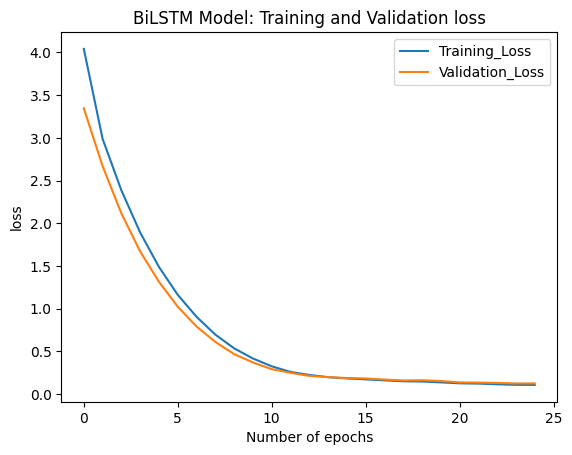

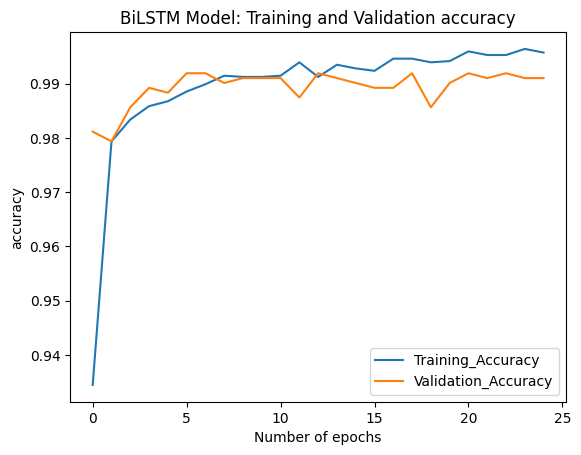

In [57]:
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
    
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [58]:
tf.saved_model.save(model, './model/bilstm')

INFO:tensorflow:Assets written to: ./model/bilstm\assets


INFO:tensorflow:Assets written to: ./model/bilstm\assets
